In [1]:
import pandas as pd
import pickle
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Rest of your code

kidney_disease_df = pd.read_csv('kidney.csv')




In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import confusion_matrix

# Identify features and target variable
X = kidney_disease_df.drop(columns=['id', 'classification'])
y = kidney_disease_df['classification']

# Preprocessing for numerical data
numerical_features = X.select_dtypes(include=['float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((320, 211), (80, 211))

In [3]:
y_train

380    notckd
228       ckd
85        ckd
371    notckd
333    notckd
        ...  
194       ckd
274    notckd
45        ckd
165       ckd
60        ckd
Name: classification, Length: 320, dtype: object

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rand_forest = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

# Train the models
log_reg.fit(X_train_processed, y_train)
rand_forest.fit(X_train_processed, y_train)
svc.fit(X_train_processed, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_processed)
y_pred_rand_forest = rand_forest.predict(X_test_processed)
y_pred_svc = svc.predict(X_test_processed)

# Evaluate the models
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_rand_forest = classification_report(y_test, y_pred_rand_forest, output_dict=True)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)


# Display the reports for Logistic Regression
report_log_reg, report_rand_forest, report_svc


({'ckd': {'precision': 0.98,
   'recall': 0.98,
   'f1-score': 0.98,
   'support': 50.0},
  'notckd': {'precision': 0.9666666666666667,
   'recall': 0.9666666666666667,
   'f1-score': 0.9666666666666667,
   'support': 30.0},
  'accuracy': 0.975,
  'macro avg': {'precision': 0.9733333333333334,
   'recall': 0.9733333333333334,
   'f1-score': 0.9733333333333334,
   'support': 80.0},
  'weighted avg': {'precision': 0.975,
   'recall': 0.975,
   'f1-score': 0.975,
   'support': 80.0}},
 {'ckd': {'precision': 0.9803921568627451,
   'recall': 1.0,
   'f1-score': 0.9900990099009901,
   'support': 50.0},
  'notckd': {'precision': 1.0,
   'recall': 0.9666666666666667,
   'f1-score': 0.9830508474576272,
   'support': 30.0},
  'accuracy': 0.9875,
  'macro avg': {'precision': 0.9901960784313726,
   'recall': 0.9833333333333334,
   'f1-score': 0.9865749286793086,
   'support': 80.0},
  'weighted avg': {'precision': 0.9877450980392156,
   'recall': 0.9875,
   'f1-score': 0.987455948984729,
   'suppo

In [5]:
# Example input for testing
example_input = {
    'age': 60,
    'bp': 80,
    'sg': 1.015,
    'al': 1,
    'su': 0,
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'notpresent',
    'ba': 'notpresent',
    'bgr': 100,
    'bu': 30,
    'sc': 1.2,
    'sod': 140,
    'pot': 4.5,
    'hemo': 15,
    'pcv': '45',
    'wc': '8000',
    'rc': '5.2',
    'htn': 'no',
    'dm': 'no',
    'cad': 'no',
    'appet': 'good',
    'pe': 'no',
    'ane': 'no'
}

# Convert the example input into a DataFrame
example_input_df = pd.DataFrame([example_input])

# Preprocess the example input using the same preprocessor
example_input_processed = preprocessor.transform(example_input_df)

# Predict using the Random Forest model
example_prediction = rand_forest.predict(example_input_processed)

# example_prediction[0]


In [6]:
example_prediction

array(['ckd'], dtype=object)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)

# Clean categorical columns by replacing incorrect values
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Rename columns to more descriptive names before defining X and y
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'peda_edema',
    'ane': 'anemia'
}, inplace=True)

# Separate features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Handle categorical variables by encoding them (if they are not numeric)
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




# Function to randomly introduce missing values
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
    X_missing[missing_mask] = np.nan
    return X_missing

# Introduce 10%, 20%, and 30% missing values in the test set
X_test_10_missing = introduce_missingness(X_test, 10)
X_test_20_missing = introduce_missingness(X_test, 20)
X_test_30_missing = introduce_missingness(X_test, 30)

# Impute missing values using KNN


In [40]:
X_encoded.isna().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
red_blood_cells             0
pus_cell                    0
pus_cell_clumps             0
bacteria                    0
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
hypertension                0
diabetes_mellitus           0
coronary_artery_disease     0
appetite                    0
peda_edema                  0
anemia                      0
dtype: int64

In [9]:
X_test_20_missing

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia
209,19.0,70.0,1.020,0.0,0.0,NaN,1.0,0.0,0.0,NaN,...,11.5,44.0,64.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
280,47.0,80.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,93.0,...,13.3,NaN,75.0,34.0,0.0,0.0,NaN,NaN,0.0,0.0
33,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,140.0,...,NaN,17.0,92.0,49.0,NaN,0.0,0.0,1.0,0.0,0.0
210,59.0,100.0,1.015,4.0,2.0,1.0,NaN,0.0,0.0,255.0,...,7.3,NaN,NaN,19.0,1.0,1.0,1.0,0.0,0.0,1.0
93,NaN,100.0,1.010,3.0,2.0,0.0,0.0,1.0,0.0,295.0,...,9.2,18.0,65.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,48.0,NaN,1.015,3.0,0.0,0.0,1.0,NaN,0.0,NaN,...,NaN,14.0,46.0,4.0,NaN,0.0,NaN,0.0,NaN,1.0
227,57.0,80.0,1.015,0.0,0.0,NaN,1.0,0.0,0.0,120.0,...,11.3,24.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0
369,75.0,70.0,1.020,NaN,0.0,1.0,1.0,0.0,NaN,NaN,...,NaN,34.0,NaN,29.0,0.0,0.0,0.0,NaN,0.0,0.0
176,21.0,90.0,1.010,NaN,0.0,1.0,NaN,NaN,1.0,107.0,...,8.3,11.0,21.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values in the training set
X_train_imputed = knn_imputer.fit_transform(X_train)

# Impute missing values in all test sets using KNN
X_test_10_imputed = knn_imputer.fit_transform(X_test_10_missing)
X_test_20_imputed = knn_imputer.fit_transform(X_test_20_missing)
X_test_30_imputed = knn_imputer.fit_transform(X_test_30_missing)

# Train a Random Forest model on the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)



# Evaluate model on the 10%, 20%, and 30% missing test sets (after imputation)
y_pred_10_missing = model.predict(X_test_10_imputed)
accuracy_10_missing = accuracy_score(y_test, y_pred_10_missing)

y_pred_20_missing = model.predict(X_test_20_imputed)
accuracy_20_missing = accuracy_score(y_test, y_pred_20_missing)

y_pred_30_missing = model.predict(X_test_30_imputed)
accuracy_30_missing = accuracy_score(y_test, y_pred_30_missing)
# Evaluate model on the fully imputed test set (100% features, after ensuring no NaN)
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Display accuracy results
accuracy_results = {
    '100% Features (Original Test Set)': accuracy_original,
    '10% Missing Features': accuracy_10_missing,
    '20% Missing Features': accuracy_20_missing,
    '30% Missing Features': accuracy_30_missing
}


accuracy_results


C:\Users\kxm828\AppData\Local\anaconda3\envs\Missing_Features_Kidney\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'100% Features (Original Test Set)': 1.0,
 '10% Missing Features': 0.975,
 '20% Missing Features': 0.9625,
 '30% Missing Features': 0.9375}

In [11]:

# import pickle
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
# from catboost import CatBoostClassifier

# # Assuming X_train_imputed and y_train are already defined and preprocessed

# # Dictionary to hold models and their names
# models = {
#     "ada_boost_model.pkl": AdaBoostClassifier(random_state=42),
#     "cat_boost_model.pkl": CatBoostClassifier(verbose=0, random_state=42),  # Suppress output for CatBoost
#     "knn_model.pkl": KNeighborsClassifier(n_neighbors=5),
#     "random_forest_model.pkl": RandomForestClassifier(random_state=42),
#     "xgb_boost_model.pkl": xgb.XGBClassifier(random_state=42),
#     "extra_tree_model.pkl": ExtraTreesClassifier(random_state=42)
# }

# # Train each model and save them as .pkl files
# for model_name, model in models.items():
#     # Train the model
#     model.fit(X_train_imputed, y_train)
    
#     # Save the trained model to a .pkl file
#     with open(model_name, 'wb') as file:
#         pickle.dump(model, file)

# print("All models have been trained and saved.")

# # Train a Random Forest model on the training data
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_imputed, y_train)

# # Evaluate model on the fully imputed test set (100% features, after ensuring no NaN)
# y_pred_original = model.predict(X_test_imputed)
# accuracy_original = accuracy_score(y_test, y_pred_original)


# # feature_names = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
# #        'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
# #        'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
# #        'potassium', 'haemoglobin', 'packed_cell_volume',
# #        'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
# #        'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
# #        'peda_edema', 'aanemia']
# # class_names= ['CKD','Non-CKD']



In [12]:
# Redefine models
# Dictionary to hold models and their names
models = {
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "cat_boost_model": CatBoostClassifier(verbose=0, random_state=42),  # Suppress output for CatBoost
    "knn_model": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "xgb_boost_model": xgb.XGBClassifier(random_state=42),
    "extra_tree_model": ExtraTreesClassifier(random_state=42)
}

X_test_imputed = knn_imputer.transform(X_test)
# Store the accuracy results for each model and missingness level (including full features)
accuracy_results = {"Model": [], "Full Features": [], "10% Missing": [], "20% Missing": [], "30% Missing": []}

# Train each model and compute accuracy for each test set with different levels of missing data
for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)  # Train on the imputed training data
    
    # Predict and compute accuracy for full features (no missingness)
    acc_full = accuracy_score(y_test, model.predict(X_test_imputed))
    
    # Predict and compute accuracy for each imputed test set with missing data
    acc_10 = accuracy_score(y_test, model.predict(X_test_10_imputed))
    acc_20 = accuracy_score(y_test, model.predict(X_test_20_imputed))
    acc_30 = accuracy_score(y_test, model.predict(X_test_30_imputed))
    
    # Append results
    accuracy_results["Model"].append(model_name)
    accuracy_results["Full Features"].append(acc_full)
    accuracy_results["10% Missing"].append(acc_10)
    accuracy_results["20% Missing"].append(acc_20)
    accuracy_results["30% Missing"].append(acc_30)

# Convert results to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df

,Model,Full Features,10% Missing,20% Missing,30% Missing
0,Ada Boost,0.9875,0.9750,0.9625,0.9125
1,cat_boost_model,0.9875,0.9875,0.9750,0.9750
2,knn_model,0.8625,0.8375,0.8250,0.8500
3,Random Forest,1.0000,0.9750,0.9625,0.9375
4,xgb_boost_model,0.9875,0.9625,0.9500,0.9625
5,extra_tree_model,0.9875,1.0000,0.9875,0.9875


/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/krishnamridha/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

## Another Imputation

In [16]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)

# Clean categorical columns by replacing incorrect values
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Rename columns to more descriptive names before defining X and y
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'peda_edema',
    'ane': 'anemia'
}, inplace=True)

# Separate features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Handle categorical variables by encoding them (if they are not numeric)
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to randomly introduce missing values
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
    X_missing[missing_mask] = np.nan
    return X_missing

# Introduce 10%, 20%, and 30% missing values in the test set
X_test_10_missing = introduce_missingness(X_test, 10)
X_test_20_missing = introduce_missingness(X_test, 20)
X_test_30_missing = introduce_missingness(X_test, 30)

# Define imputing techniques
knn_imputer = KNNImputer(n_neighbors=10)
mean_imputer = SimpleImputer(strategy='mean')
iterative_imputer = IterativeImputer(random_state=42)

# Impute missing values in the training set for all methods
X_train_knn = knn_imputer.fit_transform(X_train)
X_train_mean = mean_imputer.fit_transform(X_train)
X_train_iter = iterative_imputer.fit_transform(X_train)

# Impute missing values in all test sets using all methods
X_test_knn = knn_imputer.transform(X_test)
X_test_mean = mean_imputer.transform(X_test)
X_test_iter = iterative_imputer.transform(X_test)

X_test_10_knn = knn_imputer.transform(X_test_10_missing)
X_test_10_mean = mean_imputer.transform(X_test_10_missing)
X_test_10_iter = iterative_imputer.transform(X_test_10_missing)

X_test_20_knn = knn_imputer.transform(X_test_20_missing)
X_test_20_mean = mean_imputer.transform(X_test_20_missing)
X_test_20_iter = iterative_imputer.transform(X_test_20_missing)

X_test_30_knn = knn_imputer.transform(X_test_30_missing)
X_test_30_mean = mean_imputer.transform(X_test_30_missing)
X_test_30_iter = iterative_imputer.transform(X_test_30_missing)

# Organize the imputation methods
imputation_methods = {
    "KNN Imputer": {
        "X_train": X_train_knn,
        "X_test_full": X_test_knn,
        "X_test_10": X_test_10_knn,
        "X_test_20": X_test_20_knn,
        "X_test_30": X_test_30_knn
    },
    "Mean Imputer": {
        "X_train": X_train_mean,
        "X_test_full": X_test_mean,
        "X_test_10": X_test_10_mean,
        "X_test_20": X_test_20_mean,
        "X_test_30": X_test_30_mean
    },
    "Iterative Imputer": {
        "X_train": X_train_iter,
        "X_test_full": X_test_iter,
        "X_test_10": X_test_10_iter,
        "X_test_20": X_test_20_iter,
        "X_test_30": X_test_30_iter
    }
}

# Define models
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Store results for each imputation method
results = []
for method_name, datasets in imputation_methods.items():
    for model_name, model in models.items():
        model.fit(datasets["X_train"], y_train)
        
        # Get accuracies for full features and different levels of missingness
        acc_full = accuracy_score(y_test, model.predict(datasets["X_test_full"]))
        acc_10 = accuracy_score(y_test, model.predict(datasets["X_test_10"]))
        acc_20 = accuracy_score(y_test, model.predict(datasets["X_test_20"]))
        acc_30 = accuracy_score(y_test, model.predict(datasets["X_test_30"]))
        
        # Append results
        results.append({
            "Imputation Method": method_name,
            "Model": model_name,
            "Full Features": acc_full,
            "10% Missing": acc_10,
            "20% Missing": acc_20,
            "30% Missing": acc_30
        })
# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df

C:\Users\kxm828\AppData\Local\anaconda3\envs\Missing_Features_Kidney\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Imputation Method,Model,Full Features,10% Missing,20% Missing,30% Missing
0,KNN Imputer,AdaBoost,0.9875,0.9750,0.9500,0.9375
1,KNN Imputer,CatBoost,0.9875,0.9875,0.9750,0.9375
2,KNN Imputer,KNeighbors,0.8375,0.8250,0.8125,0.8250
3,KNN Imputer,Random Forest,1.0000,1.0000,0.9875,0.9500
4,KNN Imputer,XGBoost,0.9875,0.9875,0.9750,0.9375
5,KNN Imputer,Extra Trees,0.9875,0.9875,0.9875,0.9625
6,Mean Imputer,AdaBoost,0.9875,0.9875,0.9750,0.9500
7,Mean Imputer,CatBoost,0.9875,0.9875,0.9750,0.9625
8,Mean Imputer,KNeighbors,0.8875,0.8750,0.7750,0.7625
9,Mean Imputer,Random Forest,1.0000,0.9875,0.9625,0.9250


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate sensitivity (recall) and specificity
def calculate_specificity(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    return specificity

# Store the metrics (accuracy, sensitivity, specificity, F1) for each model and imputation method
metrics_results = {"Imputation Method": [], "Model": [], "Accuracy": [], "Sensitivity (Recall)": [], "Specificity": [], "F1-Score": []}

for method_name, datasets in imputation_methods.items():
    for model_name, model in models.items():
        # Train model with full feature set (no missingness)
        model.fit(datasets["X_train"], y_train)
        y_pred = model.predict(datasets["X_test_full"])

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        specificity = calculate_specificity(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Append results
        metrics_results["Imputation Method"].append(method_name)
        metrics_results["Model"].append(model_name)
        metrics_results["Accuracy"].append(acc)
        metrics_results["Sensitivity (Recall)"].append(sensitivity)
        metrics_results["Specificity"].append(specificity)
        metrics_results["F1-Score"].append(f1)

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_results)

metrics_df

,Imputation Method,Model,Accuracy,Sensitivity (Recall),Specificity,F1-Score
0,KNN Imputer,AdaBoost,0.9875,1.000000,0.980769,0.982456
1,KNN Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456
2,KNN Imputer,KNeighbors,0.8375,0.928571,0.788462,0.800000
3,KNN Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000
4,KNN Imputer,XGBoost,0.9875,1.000000,0.980769,0.982456
5,KNN Imputer,Extra Trees,0.9875,1.000000,0.980769,0.982456
6,Mean Imputer,AdaBoost,0.9875,1.000000,0.980769,0.982456
7,Mean Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456
8,Mean Imputer,KNeighbors,0.8875,1.000000,0.826923,0.861538
9,Mean Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000


In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)

# Clean categorical columns by replacing incorrect values
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Rename columns to more descriptive names before defining X and y
df.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'peda_edema',
    'ane': 'anemia'
}, inplace=True)

# Separate features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Handle categorical variables by encoding them (if they are not numeric)
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Function to randomly introduce missing values
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
    X_missing[missing_mask] = np.nan
    return X_missing

# Introduce 10%, 20%, and 30% missing values in the test set
X_test_10_missing = introduce_missingness(X_test, 10)
X_test_20_missing = introduce_missingness(X_test, 20)
X_test_30_missing = introduce_missingness(X_test, 30)

# Define imputing techniques
knn_imputer = KNNImputer(n_neighbors=10)
mean_imputer = SimpleImputer(strategy='mean')
iterative_imputer = IterativeImputer(random_state=42)

# Impute missing values in the training set for all methods
X_train_knn = knn_imputer.fit_transform(X_train)
X_train_mean = mean_imputer.fit_transform(X_train)
X_train_iter = iterative_imputer.fit_transform(X_train)

# Impute missing values in all test sets using all methods
X_test_knn = knn_imputer.transform(X_test)
X_test_mean = mean_imputer.transform(X_test)
X_test_iter = iterative_imputer.transform(X_test)

X_test_10_knn = knn_imputer.transform(X_test_10_missing)
X_test_10_mean = mean_imputer.transform(X_test_10_missing)
X_test_10_iter = iterative_imputer.transform(X_test_10_missing)

X_test_20_knn = knn_imputer.transform(X_test_20_missing)
X_test_20_mean = mean_imputer.transform(X_test_20_missing)
X_test_20_iter = iterative_imputer.transform(X_test_20_missing)

X_test_30_knn = knn_imputer.transform(X_test_30_missing)
X_test_30_mean = mean_imputer.transform(X_test_30_missing)
X_test_30_iter = iterative_imputer.transform(X_test_30_missing)

# Organize the imputation methods
imputation_methods = {
    "KNN Imputer": {
        "X_train": X_train_knn,
        "X_test_full": X_test_knn,
        "X_test_10": X_test_10_knn,
        "X_test_20": X_test_20_knn,
        "X_test_30": X_test_30_knn
    },
    "Mean Imputer": {
        "X_train": X_train_mean,
        "X_test_full": X_test_mean,
        "X_test_10": X_test_10_mean,
        "X_test_20": X_test_20_mean,
        "X_test_30": X_test_30_mean
    },
    "Iterative Imputer": {
        "X_train": X_train_iter,
        "X_test_full": X_test_iter,
        "X_test_10": X_test_10_iter,
        "X_test_20": X_test_20_iter,
        "X_test_30": X_test_30_iter
    }
}

# Define models
models = {
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Store results for each imputation method
results = []
for method_name, datasets in imputation_methods.items():
    for model_name, model in models.items():
        model.fit(datasets["X_train"], y_train)
        
        # Predictions for full features and different levels of missingness
        y_pred_full = model.predict(datasets["X_test_full"])
        y_pred_10 = model.predict(datasets["X_test_10"])
        y_pred_20 = model.predict(datasets["X_test_20"])
        y_pred_30 = model.predict(datasets["X_test_30"])
        
        # Calculate metrics for full features
        acc_full = accuracy_score(y_test, y_pred_full)
        recall_full = recall_score(y_test, y_pred_full)
        specificity_full = specificity_score(y_test, y_pred_full)
        f1_full = f1_score(y_test, y_pred_full)
        
        # Calculate metrics for 10% missingness
        acc_10 = accuracy_score(y_test, y_pred_10)
        recall_10 = recall_score(y_test, y_pred_10)
        specificity_10 = specificity_score(y_test, y_pred_10)
        f1_10 = f1_score(y_test, y_pred_10)
        
        # Calculate metrics for 20% missingness
        acc_20 = accuracy_score(y_test, y_pred_20)
        recall_20 = recall_score(y_test, y_pred_20)
        specificity_20 = specificity_score(y_test, y_pred_20)
        f1_20 = f1_score(y_test, y_pred_20)
        
        # Calculate metrics for 30% missingness
        acc_30 = accuracy_score(y_test, y_pred_30)
        recall_30 = recall_score(y_test, y_pred_30)
        specificity_30 = specificity_score(y_test, y_pred_30)
        f1_30 = f1_score(y_test, y_pred_30)
        
        # Append results
        results.append({
            "Imputation Method": method_name,
            "Model": model_name,
            "Full Features Accuracy": acc_full,
            "Full Features Sensitivity (Recall)": recall_full,
            "Full Features Specificity": specificity_full,
            "Full Features F1-Score": f1_full,
            "10% Missing Accuracy": acc_10,
            "10% Missing Sensitivity (Recall)": recall_10,
            "10% Missing Specificity": specificity_10,
            "10% Missing F1-Score": f1_10,
            "20% Missing Accuracy": acc_20,
            "20% Missing Sensitivity (Recall)": recall_20,
            "20% Missing Specificity": specificity_20,
            "20% Missing F1-Score": f1_20,
            "30% Missing Accuracy": acc_30,
            "30% Missing Sensitivity (Recall)": recall_30,
            "30% Missing Specificity": specificity_30,
            "30% Missing F1-Score": f1_30
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

C:\Users\kxm828\AppData\Local\anaconda3\envs\Missing_Features_Kidney\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Imputation Method,Model,Full Features Accuracy,Full Features Sensitivity (Recall),Full Features Specificity,Full Features F1-Score,10% Missing Accuracy,10% Missing Sensitivity (Recall),10% Missing Specificity,10% Missing F1-Score,20% Missing Accuracy,20% Missing Sensitivity (Recall),20% Missing Specificity,20% Missing F1-Score,30% Missing Accuracy,30% Missing Sensitivity (Recall),30% Missing Specificity,30% Missing F1-Score
0,KNN Imputer,AdaBoost,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9625,0.964286,0.961538,0.947368,0.9375,0.892857,0.961538,0.909091
1,KNN Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9750,1.000000,0.961538,0.965517,0.9750,0.964286,0.980769,0.964286
2,KNN Imputer,KNeighbors,0.8375,0.928571,0.788462,0.800000,0.8375,0.928571,0.788462,0.800000,0.8625,0.964286,0.807692,0.830769,0.8375,0.928571,0.788462,0.800000
3,KNN Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,0.9750,0.964286,0.980769,0.964286,0.9375,0.857143,0.980769,0.905660
4,KNN Imputer,XGBoost,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9750,0.964286,0.980769,0.964286,0.9750,0.964286,0.980769,0.964286
5,KNN Imputer,Extra Trees,0.9875,1.000000,0.980769,0.982456,1.0000,1.000000,1.000000,1.000000,0.9625,0.964286,0.961538,0.947368,0.9500,0.857143,1.000000,0.923077
6,Mean Imputer,AdaBoost,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9375,0.857143,0.980769,0.905660
7,Mean Imputer,CatBoost,0.9875,1.000000,0.980769,0.982456,0.9875,1.000000,0.980769,0.982456,0.9875,0.964286,1.000000,0.981818,0.9250,0.821429,0.980769,0.884615
8,Mean Imputer,KNeighbors,0.8875,1.000000,0.826923,0.861538,0.8125,0.928571,0.750000,0.776119,0.8500,1.000000,0.769231,0.823529,0.7750,0.928571,0.692308,0.742857
9,Mean Imputer,Random Forest,1.0000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,0.9875,0.964286,1.000000,0.981818,0.9125,0.785714,0.980769,0.862745


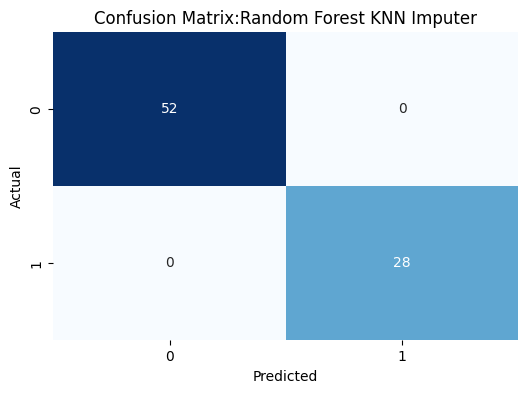

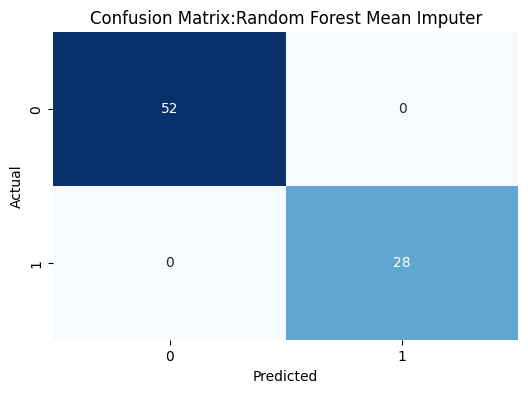

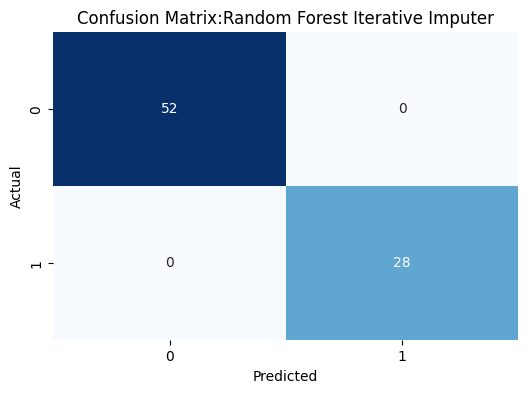

In [24]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Example: Plot confusion matrices for AdaBoost with different imputation techniques
for method_name, datasets in imputation_methods.items():
    model = RandomForestClassifier(random_state=42)
    model.fit(datasets["X_train"], y_train)
    y_pred = model.predict(datasets["X_test_full"])
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix:Random Forest {method_name}")

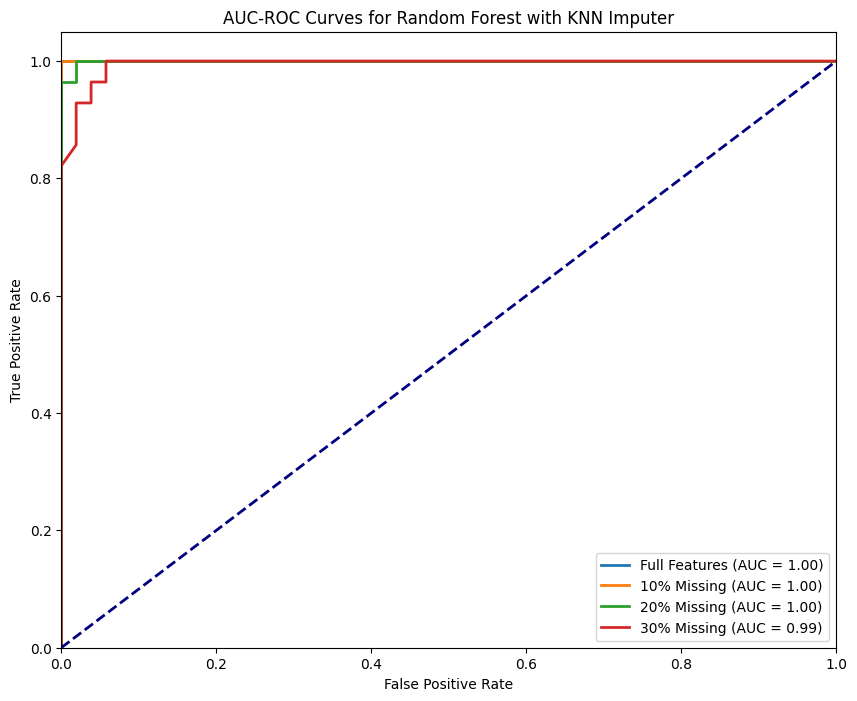

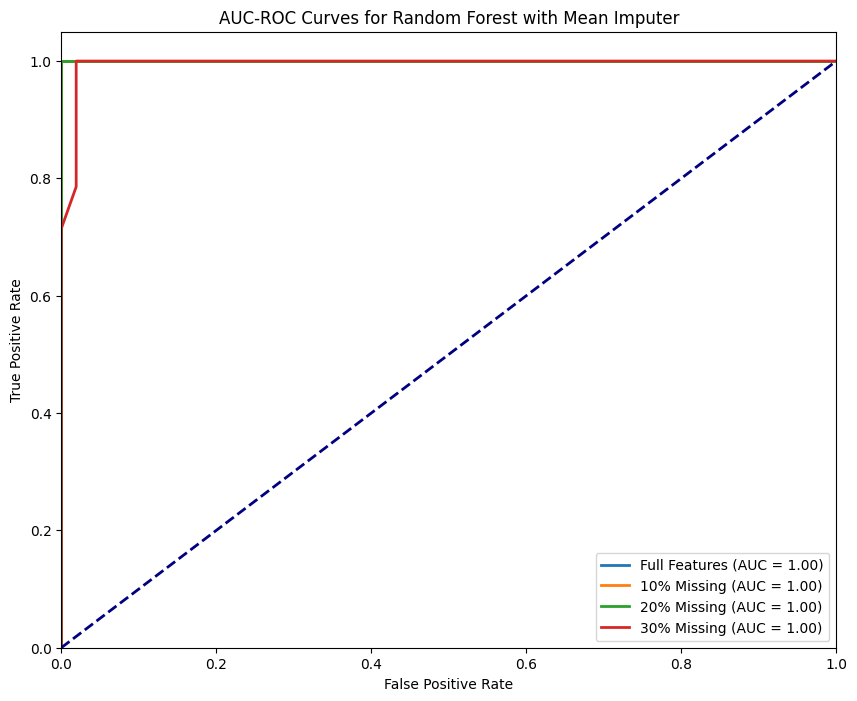

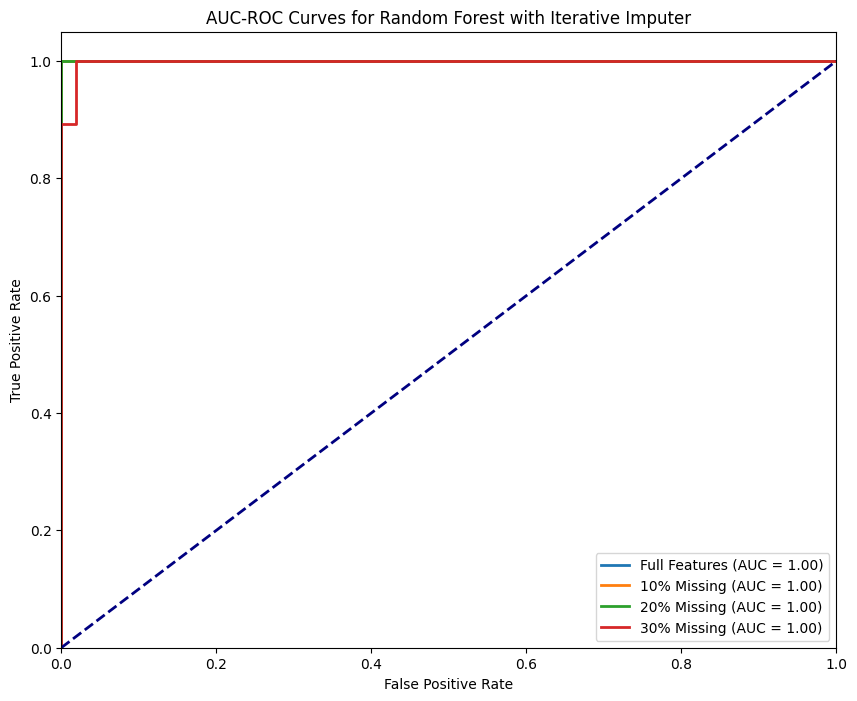

In [29]:
# Function to plot AUC-ROC for different levels of missingness
def plot_auc_roc(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Loop through each imputation method
for method_name, datasets in imputation_methods.items():
    plt.figure(figsize=(10, 8))
    model = RandomForestClassifier(random_state=42)
    model.fit(datasets["X_train"], y_train)
    
    # Full features ROC
    y_pred_prob_full = model.predict_proba(datasets["X_test_full"])[:, 1]
    fpr_full, tpr_full, _ = roc_curve(y_test, y_pred_prob_full)
    roc_auc_full = auc(fpr_full, tpr_full)
    plot_auc_roc(fpr_full, tpr_full, roc_auc_full, "Full Features")
    
    # 10% missing ROC
    y_pred_prob_10 = model.predict_proba(datasets["X_test_10"])[:, 1]
    fpr_10, tpr_10, _ = roc_curve(y_test, y_pred_prob_10)
    roc_auc_10 = auc(fpr_10, tpr_10)
    plot_auc_roc(fpr_10, tpr_10, roc_auc_10, "10% Missing")
    
    # 20% missing ROC
    y_pred_prob_20 = model.predict_proba(datasets["X_test_20"])[:, 1]
    fpr_20, tpr_20, _ = roc_curve(y_test, y_pred_prob_20)
    roc_auc_20 = auc(fpr_20, tpr_20)
    plot_auc_roc(fpr_20, tpr_20, roc_auc_20, "20% Missing")
    
    # 30% missing ROC
    y_pred_prob_30 = model.predict_proba(datasets["X_test_30"])[:, 1]
    fpr_30, tpr_30, _ = roc_curve(y_test, y_pred_prob_30)
    roc_auc_30 = auc(fpr_30, tpr_30)
    plot_auc_roc(fpr_30, tpr_30, roc_auc_30, "30% Missing")
    
    # Finalize the plot for each imputation method
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC-ROC Curves for Random Forest with {method_name}")
    plt.legend(loc="lower right")
    plt.show()


In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess the dataset
file_path = 'kidney.csv'
df = pd.read_csv(file_path)
df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['cad'] = df['cad'].replace('\tno', 'no')
df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Fill NaN values for categorical columns with the most frequent value (mode)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop unnecessary column (e.g., 'id')
df = df.drop('id', axis=1)

# Encode categorical variables
X = df.drop('classification', axis=1)
y = df['classification']
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# Impute missing values
knn_imputer = KNNImputer(n_neighbors=10)
X_encoded_imputed = knn_imputer.fit_transform(X_encoded)

# Initialize a dictionary to store predictions by original index
predictions_dict = {i: [] for i in range(len(y))}  # Each key is the sample's original index

# Perform 100 shuffles
for shuffle_num in range(100):
    # Shuffle data before each CV run
    X_shuffled, y_shuffled = shuffle(X_encoded_imputed, y, random_state=shuffle_num)
    original_indices = y_shuffled.index  # Track the original indices after shuffling

    # 5-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=shuffle_num)
    
    for train_index, val_index in kf.split(X_shuffled):
        # Get the train and validation data
        X_train, X_val = X_shuffled[train_index], X_shuffled[val_index]
        y_train, y_val = y_shuffled.iloc[train_index], y_shuffled.iloc[val_index]
        
        # Train model and get predictions
        model = AdaBoostClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Store predictions in the correct positions by original index
        for orig_index, pred in zip(original_indices[val_index], y_pred):
            predictions_dict[orig_index].append(pred)

# Convert the dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions_dict).T  # Transpose so rows are samples, columns are shuffles
predictions_df.columns = [f"s{shuffle_num + 1}" for shuffle_num in range(100)]  # Name columns as shuffles

# Add the original 'y' values as a new column in the predictions DataFrame
predictions_df['original_y'] = y.values
predictions_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s92,s93,s94,s95,s96,s97,s98,s99,s100,original_y
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
396,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
397,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
398,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

# Assume X_encoded_imputed and y are defined as your feature matrix and target labels

# Define model
model =  RandomForestClassifier(random_state=42)
n_splits = 5
n_repeats = 100

# Initialize a DataFrame to store results across 100 runs
all_results = pd.DataFrame(columns=['Repeat', 'Fold', 'Original Index', 'True Label', 'Predicted Label', 'Predicted Probability'])

# Repeat the process 100 times
for repeat in range(1, n_repeats + 1):
    # Shuffle the full dataset and store the mapping to original indices
    X_shuffled, y_shuffled = shuffle(X_encoded_imputed, y, random_state=repeat)
    original_indices = y_shuffled.index  # Track the original indices after shuffling
    
    # Initialize KFold cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)
    
    # Dictionary to store results for the current repeat
    repeat_results_dict = {
        'Repeat': [],
        'Fold': [],
        'Original Index': [],
        'True Label': [],
        'Predicted Label': [],
        'Predicted Probability': []
    }

    # Perform KFold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X_shuffled), start=1):
        X_train, X_test = X_shuffled[train_index], X_shuffled[test_index]
        y_train, y_test = y_shuffled.iloc[train_index], y_shuffled.iloc[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict and get probabilities
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Map back to original indices and store results
        for i, idx in enumerate(y_test.index):
            repeat_results_dict['Repeat'].append(repeat)
            repeat_results_dict['Fold'].append(fold)
            repeat_results_dict['Original Index'].append(original_indices[idx])  # Original index in y
            repeat_results_dict['True Label'].append(y_test.iloc[i])
            repeat_results_dict['Predicted Label'].append(y_pred[i])
            repeat_results_dict['Predicted Probability'].append(y_pred_proba[i])

    # Convert the current repeat's results to a DataFrame and append to all_results
    repeat_results_df = pd.DataFrame(repeat_results_dict)
    all_results = pd.concat([all_results, repeat_results_df], ignore_index=True)

# Sort all results by Repeat, Fold, and Original Index for organized viewing
all_results = all_results.sort_values(by=['Repeat', 'Fold', 'Original Index']).reset_index(drop=True)




C:\Users\kxm828\AppData\Local\Temp\ipykernel_24020\1151795263.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_results = pd.concat([all_results, repeat_results_df], ignore_index=True)


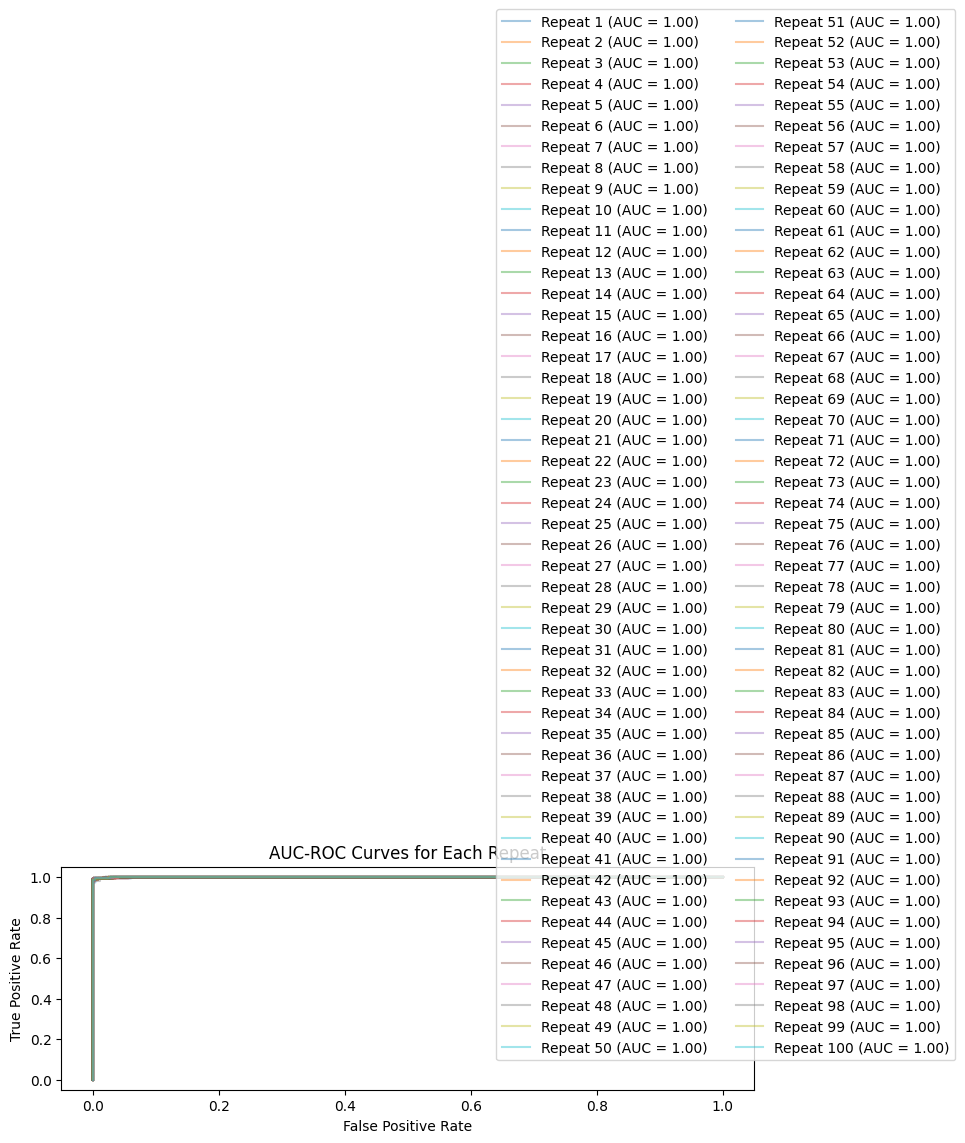

AUC scores for each repeat: [0.9998133333333333, 0.9996533333333333, 0.9998133333333333, 0.9998266666666666, 0.99972, 0.9998666666666667, 0.9998666666666667, 0.9998133333333334, 0.9998, 0.9997466666666667, 0.9994933333333333, 0.9998533333333334, 0.9998666666666668, 0.9998133333333334, 0.9998, 0.99976, 0.9997866666666666, 0.9997866666666667, 0.9997733333333334, 0.9998133333333334, 0.9998266666666668, 0.9998133333333333, 0.9998133333333334, 0.99984, 0.9997733333333334, 0.9998400000000001, 0.9998400000000001, 0.9997466666666668, 0.9998133333333333, 0.9998666666666667, 0.9997466666666668, 0.9997733333333335, 0.9998400000000001, 0.9998133333333333, 0.99976, 0.9997333333333335, 0.9997733333333334, 0.9996800000000001, 0.9998266666666668, 0.9998133333333334, 0.9997600000000001, 0.9998400000000001, 0.9998, 0.9996, 0.9998400000000001, 0.9998, 0.9998133333333334, 0.99976, 0.9998666666666667, 0.9997866666666667, 0.9997733333333333, 0.9998133333333333, 0.9998133333333334, 0.9997866666666667, 0.9998

In [42]:
# Initialize a list to store AUC scores for each repeat
auc_scores = []

# Plotting the AUC-ROC for each repeat
plt.figure(figsize=(10, 8))
for repeat in range(1, n_repeats + 1):
    # Filter the results for the current repeat
    repeat_data = all_results[all_results['Repeat'] == repeat]
    
    # Extract true labels and predicted probabilities and ensure they are numeric
    y_true_repeat = pd.to_numeric(repeat_data['True Label'], errors='coerce')
    y_pred_proba_repeat = pd.to_numeric(repeat_data['Predicted Probability'], errors='coerce')
    
    # Check for binary format in y_true
    unique_labels = y_true_repeat.unique()
    if len(unique_labels) > 2:
        raise ValueError(f"Unexpected labels in y_true: {unique_labels}. Ensure binary labels.")

    # Calculate ROC curve and AUC for this repeat
    fpr, tpr, _ = roc_curve(y_true_repeat, y_pred_proba_repeat)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Plot the ROC curve for this repeat
    plt.plot(fpr, tpr, label=f'Repeat {repeat} (AUC = {roc_auc:.2f})', alpha=0.4)  # Use alpha for transparency

# Final plot adjustments
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Each Repeat')
plt.legend(loc="lower right", bbox_to_anchor=(1.3, 0.1), ncol=2)  # Adjust legend position if too crowded
plt.tight_layout()
plt.show()

# Optional: Display or analyze AUC scores for each repeat
print("AUC scores for each repeat:", auc_scores)


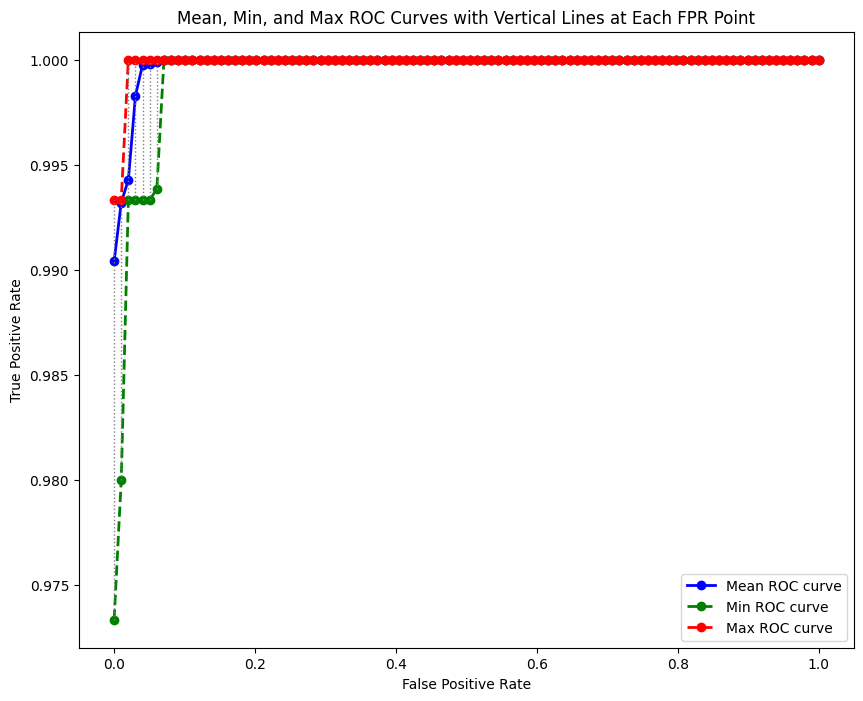

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number of points to interpolate along the FPR axis
n_points = 100
fpr_grid = np.linspace(0, 1, n_points)

# Initialize list to store interpolated TPR values for each repeat
tpr_interpolated = []
auc_scores = []

# Repeat loop to calculate ROC and interpolate TPR
for repeat in range(1, n_repeats + 1):
    # Filter the results for the current repeat
    repeat_data = all_results[all_results['Repeat'] == repeat]
    
    # Extract true labels and predicted probabilities
    y_true_repeat = pd.to_numeric(repeat_data['True Label'], errors='coerce')
    y_pred_proba_repeat = pd.to_numeric(repeat_data['Predicted Probability'], errors='coerce')
    
    # Calculate ROC curve and AUC for this repeat
    fpr, tpr, _ = roc_curve(y_true_repeat, y_pred_proba_repeat)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Interpolate TPR values to align with the common FPR grid
    tpr_interpolated.append(np.interp(fpr_grid, fpr, tpr))

# Convert interpolated TPR values to a DataFrame for easy analysis
tpr_interpolated = np.array(tpr_interpolated)
tpr_df = pd.DataFrame(tpr_interpolated, columns=fpr_grid)

# Calculate mean, min, and max of TPR at each FPR point across repeats
tpr_mean = tpr_df.mean(axis=0)
tpr_min = tpr_df.min(axis=0)
tpr_max = tpr_df.max(axis=0)

# Plot the mean, min, and max ROC curves with vertical lines for each FPR point
plt.figure(figsize=(10, 8))
plt.plot(fpr_grid, tpr_mean, marker='o', color='blue', label='Mean ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_min, marker='o', color='green', linestyle='--', label='Min ROC curve', linewidth=2)
plt.plot(fpr_grid, tpr_max, marker='o', color='red', linestyle='--', label='Max ROC curve', linewidth=2)

# Adding vertical lines at each FPR point to show the range between min and max TPR values
for i in range(len(fpr_grid)):
    plt.vlines(x=fpr_grid[i], ymin=tpr_min.iloc[i], ymax=tpr_max.iloc[i], colors='grey', linestyles='dotted', linewidth=1)

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean, Min, and Max ROC Curves with Vertical Lines at Each FPR Point')
plt.legend(loc="lower right")
plt.show()


In [30]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# import xgboost as xgb
# from catboost import CatBoostClassifier
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# file_path = 'kidney.csv'
# df = pd.read_csv(file_path)

# # Clean categorical columns by replacing incorrect values
# df['dm'] = df['dm'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
# df['cad'] = df['cad'].replace('\tno', 'no')
# df['classification'] = df['classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

# # Map 'classification' to binary values (0 for 'ckd', 1 for 'not ckd')
# df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# # Fill NaN values for categorical columns with the most frequent value (mode)
# cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# for col in cat_cols:
#     df[col] = df[col].fillna(df[col].mode()[0])

# # Drop unnecessary column (e.g., 'id')
# df = df.drop('id', axis=1)

# # Rename columns to more descriptive names before defining X and y
# df.rename(columns={
#     'bp': 'blood_pressure',
#     'sg': 'specific_gravity',
#     'al': 'albumin',
#     'su': 'sugar',
#     'rbc': 'red_blood_cells',
#     'pc': 'pus_cell',
#     'pcc': 'pus_cell_clumps',
#     'ba': 'bacteria',
#     'bgr': 'blood_glucose_random',
#     'bu': 'blood_urea',
#     'sc': 'serum_creatinine',
#     'sod': 'sodium',
#     'pot': 'potassium',
#     'hemo': 'haemoglobin',
#     'pcv': 'packed_cell_volume',
#     'wc': 'white_blood_cell_count',
#     'rc': 'red_blood_cell_count',
#     'htn': 'hypertension',
#     'dm': 'diabetes_mellitus',
#     'cad': 'coronary_artery_disease',
#     'appet': 'appetite',
#     'pe': 'peda_edema',
#     'ane': 'anemia'
# }, inplace=True)

# # Separate features and target variable
# X = df.drop('classification', axis=1)
# y = df['classification']

# # Handle categorical variables by encoding them (if they are not numeric)
# X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)

# # Split the data into 80% training and 20% testing
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Function to randomly introduce missing values
# def introduce_missingness(X, missing_percent):
#     X_missing = X.copy()
#     missing_mask = np.random.rand(*X.shape) < (missing_percent / 100)
#     X_missing[missing_mask] = np.nan
#     return X_missing

# # Introduce 10%, 20%, and 30% missing values in the test set
# X_test_10_missing = introduce_missingness(X_test, 10)
# X_test_20_missing = introduce_missingness(X_test, 20)
# X_test_30_missing = introduce_missingness(X_test, 30)

# # Define imputing techniques
# knn_imputer = KNNImputer(n_neighbors=10)
# mean_imputer = SimpleImputer(strategy='mean')
# iterative_imputer = IterativeImputer(random_state=42)

# # Impute missing values in the training set for all methods
# X_train_knn = knn_imputer.fit_transform(X_train)
# X_train_mean = mean_imputer.fit_transform(X_train)
# X_train_iter = iterative_imputer.fit_transform(X_train)

# # Impute missing values in all test sets using all methods
# X_test_knn = knn_imputer.transform(X_test)
# X_test_mean = mean_imputer.transform(X_test)
# X_test_iter = iterative_imputer.transform(X_test)

# X_test_10_knn = knn_imputer.transform(X_test_10_missing)
# X_test_10_mean = mean_imputer.transform(X_test_10_missing)
# X_test_10_iter = iterative_imputer.transform(X_test_10_missing)

# X_test_20_knn = knn_imputer.transform(X_test_20_missing)
# X_test_20_mean = mean_imputer.transform(X_test_20_missing)
# X_test_20_iter = iterative_imputer.transform(X_test_20_missing)

# X_test_30_knn = knn_imputer.transform(X_test_30_missing)
# X_test_30_mean = mean_imputer.transform(X_test_30_missing)
# X_test_30_iter = iterative_imputer.transform(X_test_30_missing)

# # Organize the imputation methods
# imputation_methods = {
#     "KNN Imputer": {
#         "X_train": X_train_knn,
#         "X_test_full": X_test_knn,
#         "X_test_10": X_test_10_knn,
#         "X_test_20": X_test_20_knn,
#         "X_test_30": X_test_30_knn
#     },
#     "Mean Imputer": {
#         "X_train": X_train_mean,
#         "X_test_full": X_test_mean,
#         "X_test_10": X_test_10_mean,
#         "X_test_20": X_test_20_mean,
#         "X_test_30": X_test_30_mean
#     },
#     "Iterative Imputer": {
#         "X_train": X_train_iter,
#         "X_test_full": X_test_iter,
#         "X_test_10": X_test_10_iter,
#         "X_test_20": X_test_20_iter,
#         "X_test_30": X_test_30_iter
#     }
# }

# # Define models
# models = {
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
#     "KNeighbors": KNeighborsClassifier(n_neighbors=5),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": xgb.XGBClassifier(random_state=42),
#     "Extra Trees": ExtraTreesClassifier(random_state=42)
# }

# # Store results for each imputation method
# results = []
# for method_name, datasets in imputation_methods.items():
#     for model_name, model in models.items():
#         model.fit(datasets["X_train"], y_train)
        
#         # Get accuracies for full features and different levels of missingness
#         acc_full = accuracy_score(y_test, model.predict(datasets["X_test_full"]))
#         acc_10 = accuracy_score(y_test, model.predict(datasets["X_test_10"]))
#         acc_20 = accuracy_score(y_test, model.predict(datasets["X_test_20"]))
#         acc_30 = accuracy_score(y_test, model.predict(datasets["X_test_30"]))
        
#         # Append results
#         results.append({
#             "Imputation Method": method_name,
#             "Model": model_name,
#             "Full Features": acc_full,
#             "10% Missing": acc_10,
#             "20% Missing": acc_20,
#             "30% Missing": acc_30
#         })

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)
# results_df

# # Function to plot confusion matrix
# def plot_confusion_matrix(y_true, y_pred, title):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#     plt.title(title)
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.show()

# # Example: Plot confusion matrices for AdaBoost with different imputation techniques
# for method_name, datasets in imputation_methods.items():
#     model = AdaBoostClassifier(random_state=42)
#     model.fit(datasets["X_train"], y_train)
#     y_pred = model.predict(datasets["X_test_full"])
#     plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix: AdaBoost with {method_name}")

# # Function to plot AUC-ROC for different levels of missingness
# def plot_auc_roc(fpr, tpr, roc_auc, label):
#     plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# # Loop through each imputation method
# for method_name, datasets in imputation_methods.items():
#     plt.figure(figsize=(10, 8))
#     model = AdaBoostClassifier(random_state=42)
#     model.fit(datasets["X_train"], y_train)
    
#     # Full features ROC
#     y_pred_prob_full = model.predict_proba(datasets["X_test_full"])[:, 1]
#     fpr_full, tpr_full, _ = roc_curve(y_test, y_pred_prob_full)
#     roc_auc_full = auc(fpr_full, tpr_full)
#     plot_auc_roc(fpr_full, tpr_full, roc_auc_full, "Full Features")
    
#     # 10% missing ROC
#     y_pred_prob_10 = model.predict_proba(datasets["X_test_10"])[:, 1]
#     fpr_10, tpr_10, _ = roc_curve(y_test, y_pred_prob_10)
#     roc_auc_10 = auc(fpr_10, tpr_10)
#     plot_auc_roc(fpr_10, tpr_10, roc_auc_10, "10% Missing")
    
#     # 20% missing ROC
#     y_pred_prob_20 = model.predict_proba(datasets["X_test_20"])[:, 1]
#     fpr_20, tpr_20, _ = roc_curve(y_test, y_pred_prob_20)
#     roc_auc_20 = auc(fpr_20, tpr_20)
#     plot_auc_roc(fpr_20, tpr_20, roc_auc_20, "20% Missing")
    
#     # 30% missing ROC
#     y_pred_prob_30 = model.predict_proba(datasets["X_test_30"])[:, 1]
#     fpr_30, tpr_30, _ = roc_curve(y_test, y_pred_prob_30)
#     roc_auc_30 = auc(fpr_30, tpr_30)
#     plot_auc_roc(fpr_30, tpr_30, roc_auc_30, "30% Missing")
    
#     # Finalize the plot for each imputation method
#     plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title(f"AUC-ROC Curves for AdaBoost with {method_name}")
#     plt.legend(loc="lower right")
#     plt.show()


## Explainability

In [31]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Assume model is trained and X_test is prepared
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_imputed)

if isinstance(shap_values, list):
    shap_values_class_0 = shap_values[0]  # SHAP values for class 0
    shap_values_class_1 = shap_values[1]  # SHAP values for class 1
else:
    # For a 3D array
    shap_values_class_0 = shap_values[:, :, 0]  # SHAP values for class 0
    shap_values_class_1 = shap_values[:, :, 1]  # SHAP values for class 1


In [32]:
feature_names = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia']

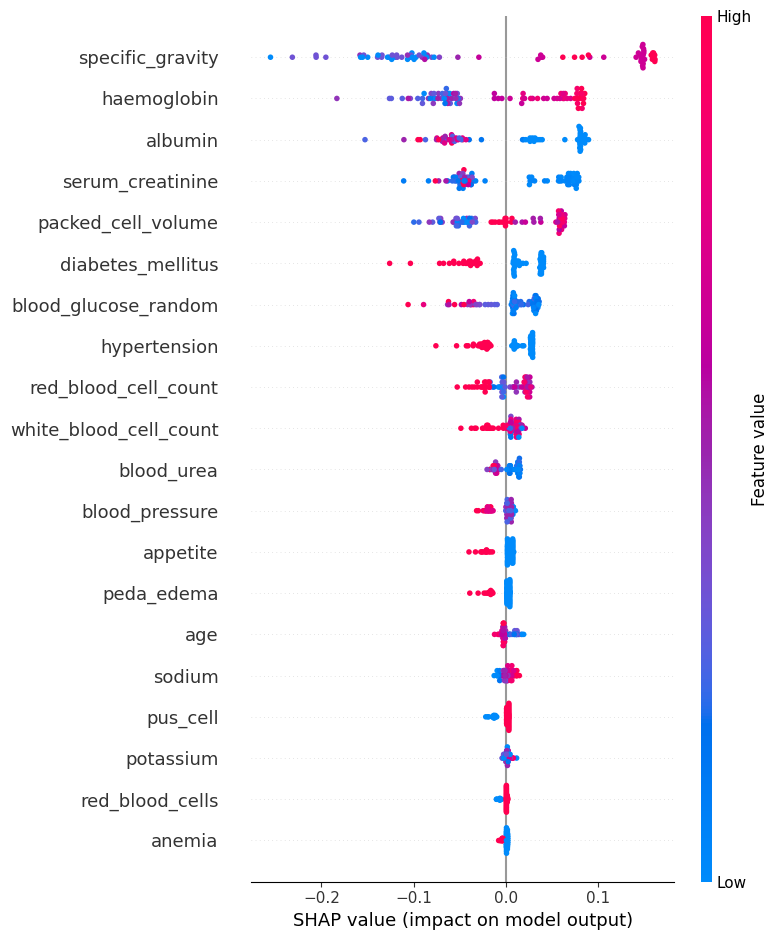

In [33]:
shap.summary_plot(shap_values_class_1, X_test_imputed, feature_names=feature_names)


SHAP values are in a multi-dimensional array format:
Shape of SHAP values: (80, 24, 2)


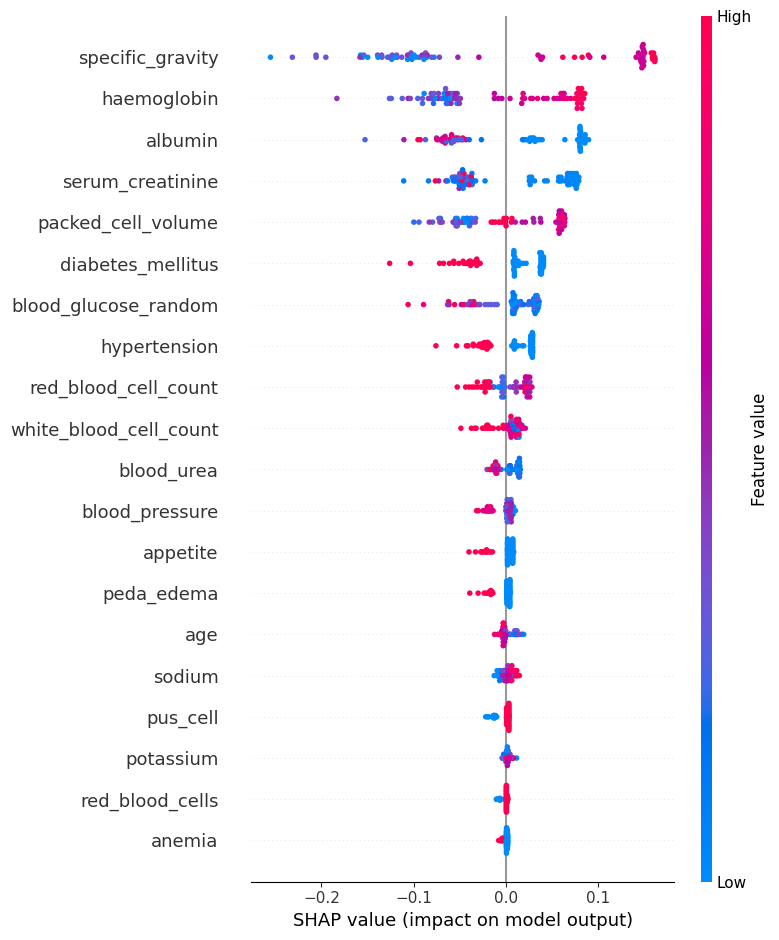

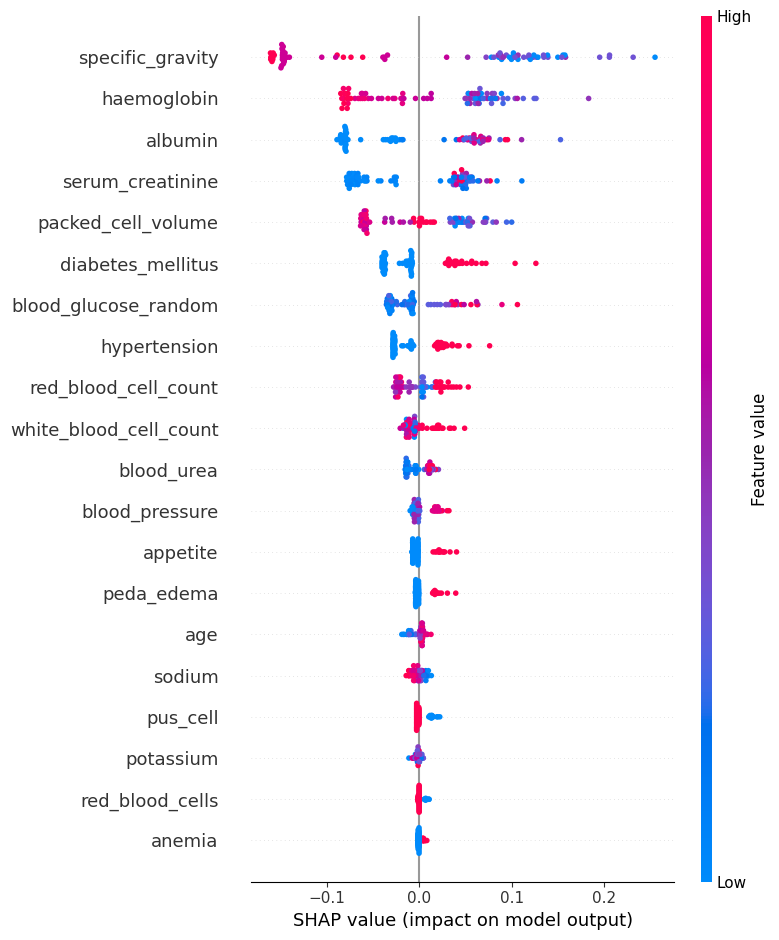

In [34]:

# Check the type of SHAP values and print their shape
if isinstance(shap_values, list):
    print("SHAP values are in a list format:")
    for i, sv in enumerate(shap_values):
        print(f"Shape of SHAP values for class {i}: {sv.shape}")  # Print the shape for each class
else:
    print("SHAP values are in a multi-dimensional array format:")
    print(f"Shape of SHAP values: {shap_values.shape}")

# Now we can access the SHAP values based on their format
if isinstance(shap_values, list):
    shap_values_class_0 = shap_values[0]  # For class 0
    shap_values_class_1 = shap_values[1]  # For class 1
else:
    shap_values_class_0 = shap_values[:, :, 0]  # For class 0
    shap_values_class_1 = shap_values[:, :, 1]  # For class 1


# Plot SHAP summary for class 1 (Non-CKD)
shap.summary_plot(shap_values_class_1, X_test_imputed, feature_names=feature_names)

# Optionally, plot SHAP summary for class 0 (CKD)
shap.summary_plot(shap_values_class_0, X_test_imputed, feature_names=feature_names)



In [35]:
class_names = ['CKD', 'Non_CKD']

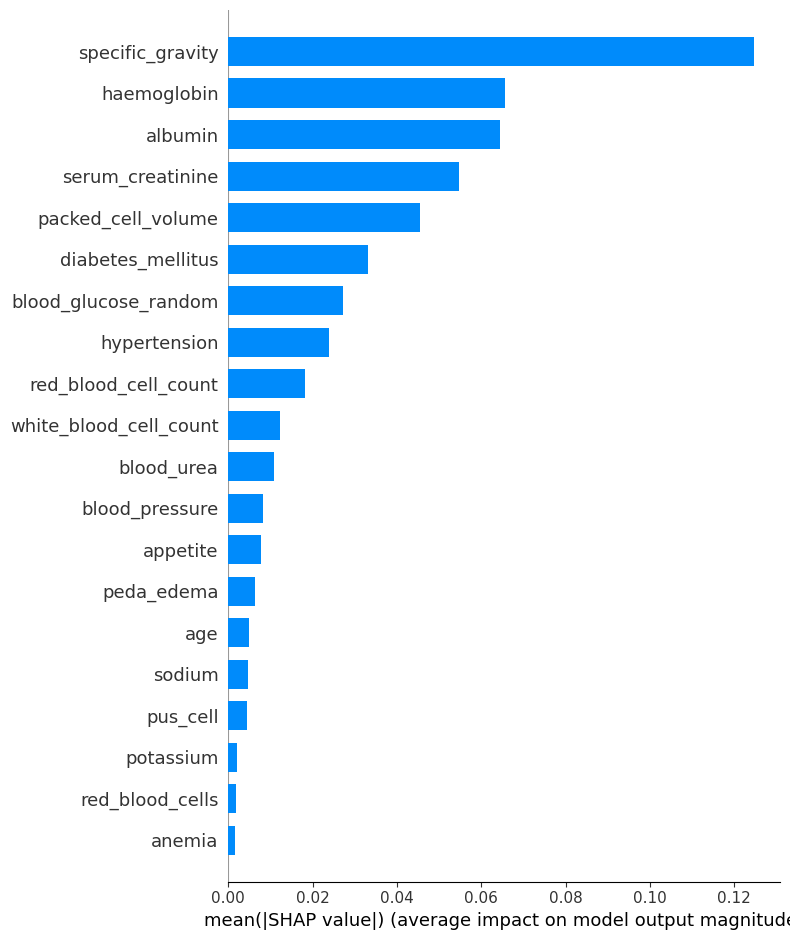

In [36]:
# Summary plot using bar plot style (feature names will be displayed automatically)
shap.summary_plot(shap_values_class_1,  X_test_imputed, feature_names = feature_names, class_names =class_names, plot_type="bar")

In [37]:
# Example input for a new patient with some features missing (use np.nan for missing features)
new_patient_input = {
    'age': 10,                   # Example value
    'blood_pressure': 80,        # Example value (bp)
    'specific_gravity': 0.020,   # Example value (sg)
    'albumin': np.nan,           # Missing value (al)
    'sugar': 0,                  # Example value (su)
    'red_blood_cells': 'normal', # Example value (rbc) (should be converted)
    'pus_cell': 'normal',        # Example value (pc) (should be converted)
    'pus_cell_clumps': 'no',     # Example value (pcc) (should be converted)
    'bacteria': 'no',            # Example value (ba) (should be converted)
    'blood_glucose_random': 120,  # Example value (bgr)
    'blood_urea': 50,            # Example value (bu)
    'serum_creatinine': np.nan,   # Missing value (sc)
    'sodium': 118,               # Example value (sod)
    'potassium': 4.5,            # Example value (pot)
    'haemoglobin': 15,           # Example value (hemo)
    'packed_cell_volume': 25,    # Example value (pcv)
    'white_blood_cell_count': 6.5,# Example value (wc)
    'red_blood_cell_count': 5.5, # Example value (rc)
    'hypertension': 'no',        # Example value (htn) (should be converted)
    'diabetes_mellitus': 'no',   # Example value (dm) (should be converted)
    'coronary_artery_disease': 'no',  # Example value (cad) (should be converted)
    'appetite': 'good',          # Example value (appet) (should be converted)
    'peda_edema': 'no',          # Example value (pe) (should be converted)
    'anemia': 'no'               # Example value (ane) (should be converted)
}

# Mapping function to convert categorical string values to numeric
def map_categorical_to_numeric(value):
    if value == 'normal':
        return 1
    elif value == 'abnormal':
        return 0
    elif value == 'yes':
        return 1
    elif value == 'no':
        return 0
    elif value == 'good':
        return 0
    elif value == 'poor':
        return 1
    elif value == 'present':
        return 1
    elif value == 'not present':
        return 0
    else:
        return np.nan  # Handle other cases as NaN

# Convert the patient input to a DataFrame
new_patient_df = pd.DataFrame([new_patient_input])

# Apply the mapping function to categorical columns
categorical_columns = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 
                       'bacteria', 'hypertension', 'diabetes_mellitus', 
                       'coronary_artery_disease', 'appetite', 'peda_edema', 
                       'anemia']

for col in categorical_columns:
    new_patient_df[col] = new_patient_df[col].apply(map_categorical_to_numeric)

# Initialize the KNN imputer using the training data
knn_imputer = KNNImputer(n_neighbors=3)

# Fit the imputer on the training data
knn_imputer.fit(X_train)  # Fit the imputer on the training data

# Impute missing values using the KNN imputer on the new patient data
new_patient_imputed = knn_imputer.transform(new_patient_df)

# Make a prediction using the trained model
predicted_class = model.predict(new_patient_imputed)

# Get the probability scores for each class
predicted_probabilities = model.predict_proba(new_patient_imputed)

# Extract the probabilities for the positive class (assuming 1 is the positive class)
positive_class_probability = predicted_probabilities[0][1]  # Probability of class 1 (Non-CKD)
negative_class_probability = predicted_probabilities[0][0]  # Probability of class 0 (CKD)

# Convert predicted class back to label (assuming 0 is 'ckd' and 1 is 'not ckd')
predicted_label = 'not ckd' if predicted_class[0] == 1 else 'ckd'

# Define important features that are critical for prediction
important_features = ['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin', 'packed_cell_volume']

# Check if important features are missing in the new patient input
missing_features = [feature for feature in important_features if new_patient_df[feature].isna().any()]

# Display the result
print(f'The predicted class for the new patient is: {predicted_label}')
print(f'Probability of being Non-CKD (positive class): {positive_class_probability:.2f}')
print(f'Probability of being CKD (negative class): {negative_class_probability:.2f}')

# Check for missing important features and give a cautionary alert
if missing_features:
    print("⚠️ Warning: The following important features are missing:")
    for feature in missing_features:
        print(f"- {feature}")
    print("Even though we provide you with prediction results, please note that having these tests is crucial for accurate diagnosis.")


The predicted class for the new patient is: ckd
Probability of being Non-CKD (positive class): 0.08
Probability of being CKD (negative class): 0.92
⚠️ Warning: The following important features are missing:
- serum_creatinine
- albumin
Even though we provide you with prediction results, please note that having these tests is crucial for accurate diagnosis.


In [38]:
from sklearn.ensemble import RandomForestClassifier
import pickle


In [39]:
# Save the model to a pkl file
with open('kideny_rf.pkl', 'wb') as file:
    pickle.dump(model, file)
